# 3 記述統計：データの集計と可視化

## 3.1 データのクリーニングと加工

## 3.2 表によるデータの集計

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [8]:
df_id_age = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（IDデータ）').iloc[:, 0:3]
df_id_age.head()

,顧客ID,性別,年代
0,1001,2,70
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40


In [30]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos = pd.merge(df_id_pos, df_id_age, on='顧客ID')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋,2,60
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱,2,60
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス,2,60
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト,2,60
4,438,2,13,1518,265,265,1,13,畜産,1313,精肉加工品,131312,鶏卵,2,60


In [56]:
# 単純集計（GT: grand total）表
df_age_group = pd.DataFrame()
df_id_age_10_90 = df_id_age[df_id_age['年代'] != 100]
df_age_group['頻度'] = df_id_age_10_90.groupby(['年代']).size()
df_age_group['構成比率'] = df_age_group['頻度'] / len(df_id_age)
df_age_group.T

年代,10,20,30,40,50,60,70,80,90
頻度,4.000,33.000,103.000,250.00,167.000,149.000,81.000,18.000,1.000
構成比率,0.004,0.033,0.103,0.25,0.167,0.149,0.081,0.018,0.001


In [80]:
# クロス集計表（構成比率）
for col in df_cross_freq.columns:
    df_cross_freq[col] = (df_cross_freq[col] / df_cross_freq['合計'] * 100).round(2)
df_cross_freq

年代,10,20,30,40,50,60,70,80,90,合計
来店頻度,,,,,,,,,,
"(0, 5]",0.45,4.91,12.95,32.37,20.31,17.63,9.15,2.23,0.0,100.0
"(5, 10]",1.09,2.73,14.21,28.42,19.13,21.86,9.84,2.73,0.0,100.0
"(10, 15]",0.00,5.00,11.25,33.75,20.00,18.75,8.75,2.50,0.0,100.0
"(15, 20]",0.00,0.00,18.00,30.00,22.00,18.00,10.00,0.00,2.0,100.0
"(20, 25]",0.00,3.12,3.12,28.12,31.25,12.50,21.88,0.00,0.0,100.0
"(25, 30]",0.00,7.69,0.00,15.38,30.77,15.38,23.08,7.69,0.0,100.0


## 3.3 グラフによるデータの可視化

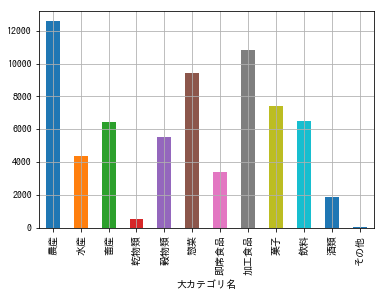

In [87]:
# 棒グラフ（大カテゴリごとの販売個数)
df_bar = df_id_pos.groupby(['大カテゴリ名']).size()
df_bar = df_bar.reindex(['農産', '水産', '畜産', '乾物類', '穀物類', '惣菜', '即席食品', '加工食品', '菓子', '飲料', '酒類', 'その他'])
df_bar.plot.bar(grid=True)

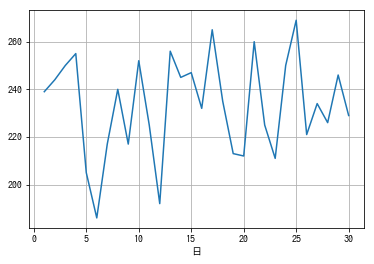

In [89]:
# 折れ線グラフ（来店客数推移）
df_line = df_id_pos.groupby(['日'])['レシートNo'].nunique()
df_line.plot(grid=True, style='-')

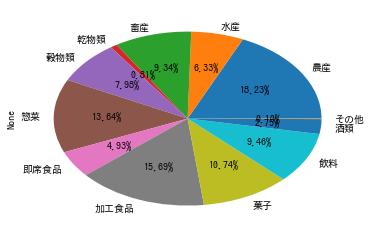

In [96]:
# 棒グラフ（大カテゴリごとの販売個数割合)
df_bar = df_id_pos.groupby(['大カテゴリ名']).size() / len(df_id_pos)
df_bar = df_bar.reindex(['農産', '水産', '畜産', '乾物類', '穀物類', '惣菜', '即席食品', '加工食品', '菓子', '飲料', '酒類', 'その他'])
df_bar.plot.pie(autopct='{:.2f}%'.format)

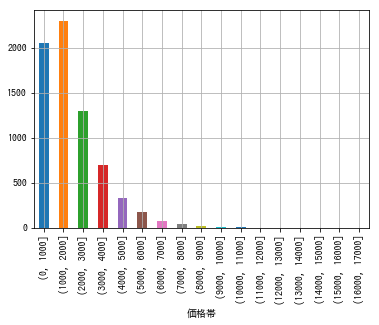

In [146]:
# ヒストグラム（価格毎の度数）
bins = [i for i in range(0, 18000, 1000)]
df_hist = pd.DataFrame()
df_hist['価格帯'] = pd.cut(df_id_pos.groupby(['レシートNo'])['税抜価格'].sum(), bins)
df_hist = df_hist.groupby(['価格帯']).size()
df_hist.plot.bar(grid=True)

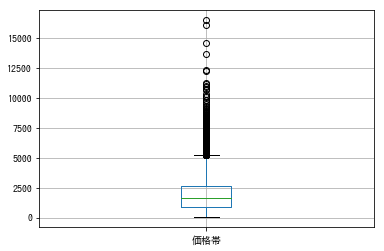

In [152]:
# 箱ひげ図（価格毎の度数）
df_boxplot = pd.DataFrame()
df_boxplot['価格帯'] = df_id_pos.groupby(['レシートNo'])['税抜価格'].sum()
df_boxplot.boxplot()

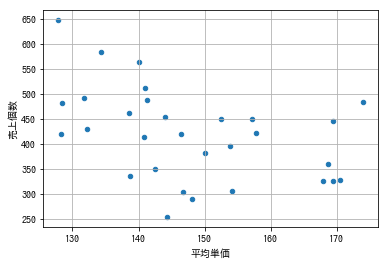

In [157]:
# 散布図（農産カテゴリ日別商品単価と売上個数）
df_scatter = pd.DataFrame()
df_scatter['平均単価'] = df_id_pos[df_id_pos['大カテゴリ名'] == '農産'].groupby(['日'])['税抜価格'].mean()
df_scatter['売上個数'] = df_id_pos[df_id_pos['大カテゴリ名'] == '農産'].groupby(['日'])['税抜価格'].size()
df_scatter.plot.scatter(x='平均単価', y='売上個数', grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6512937710>,
      dtype=object)

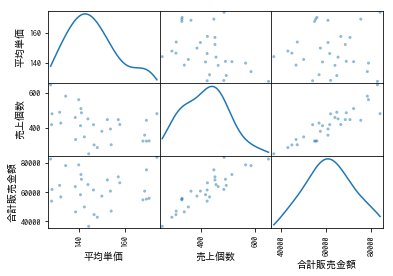

In [159]:
# ３変数の散布図（農産カテゴリ日別商品単価、売上個数、合計販売金額）
from pandas.plotting import scatter_matrix

df_scatter['合計販売金額'] = df_id_pos[df_id_pos['大カテゴリ名'] == '農産'].groupby(['日'])['税抜価格'].sum()
scatter_matrix(df_scatter, diagonal='kde')

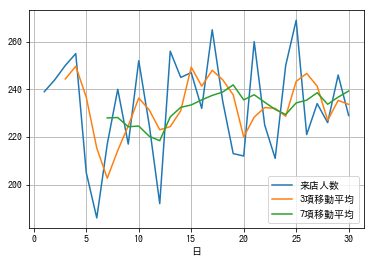

In [162]:
# 折れ線グラフ（来店客数推移）の移動平均
df_lines = pd.DataFrame()
df_lines['来店人数'] = df_id_pos.groupby(['日'])['レシートNo'].nunique()
df_lines['3項移動平均'] = df_lines['来店人数'].rolling(3).mean()
df_lines['7項移動平均'] = df_lines['来店人数'].rolling(7).mean()
df_lines.plot(grid=True, style='-')

In [167]:
# 基本統計量
df_basic_stats = pd.DataFrame()
df_basic_stats['来店客数（人）'] = df_id_pos.groupby(['日'])['顧客ID'].nunique()
df_basic_stats['合計販売個数（個）'] = df_id_pos.groupby(['日']).size()
df_basic_stats['合計販売金額（円）'] = df_id_pos.groupby(['日'])['税抜価格'].sum()
df_basic_stats.describe()

,来店客数（人）,合計販売個数（個）,合計販売金額（円）
count,30.000000,30.000000,30.000000
mean,233.266667,2302.633333,459962.500000
std,20.817654,329.596669,67866.526317
min,186.000000,1559.000000,303205.000000
25%,218.000000,2032.000000,421080.000000
50%,234.500000,2324.000000,455677.500000
75%,249.250000,2559.750000,507900.000000
max,269.000000,2801.000000,583855.000000


In [168]:
# 上記項目間相関係数
df_basic_stats.corr()

,来店客数（人）,合計販売個数（個）,合計販売金額（円）
来店客数（人）,1.000000,0.850682,0.754166
合計販売個数（個）,0.850682,1.000000,0.915199
合計販売金額（円）,0.754166,0.915199,1.000000
